# E5 Advanced geospatial plotting 

In [1]:
# importing libraries

import pandas as pd
import os
from keplergl import KeplerGl
import numpy as np
from matplotlib import pyplot as plt
import requests




C:\Users\obiki\anaconda3\envs\venv_citibikes\Lib\site-packages\keplergl\keplergl.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


# importing newyork data file

In [2]:
df = pd.read_csv("newyork_data.csv", index_col=0, nrows=1000000, low_memory=False)  # loading the first 1 million rows

## Data preprocessing

# Creating a value column and group by start and end station 

In [3]:
df.columns    # confirming columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

# Creating a value and group by start and end station name

In [4]:

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [5]:
df_group     # confirming the group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,27
1,1 Ave & E 110 St,1 Ave & E 44 St,2
2,1 Ave & E 110 St,1 Ave & E 68 St,1
3,1 Ave & E 110 St,1 Ave & E 78 St,3
4,1 Ave & E 110 St,1 Ave & E 94 St,15
...,...,...,...
206020,Yankee Ferry Terminal,Picnic Point,16
206021,Yankee Ferry Terminal,Soissons Landing,19
206022,Yankee Ferry Terminal,South St & Gouverneur Ln,1
206023,Yankee Ferry Terminal,South St & Whitehall St,5


# confirming that the group by function has been done correctly

In [6]:
print(df_group['value'].sum())
print(df.shape)

990711
(1000000, 17)


In [7]:
df_group['value'].describe()

count    206025.000000
mean          4.808693
std           8.590943
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         428.000000
Name: value, dtype: float64

### Some exploratory analysis into the trips

# Plotting a histogram

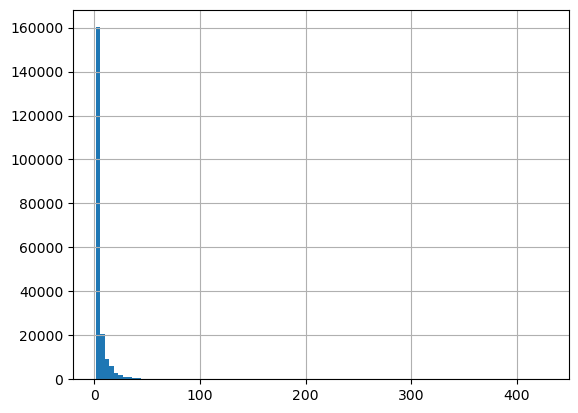

In [8]:
df_group['value'].hist(bins = 100)
plt.show()

# plotting a boxplot

[]

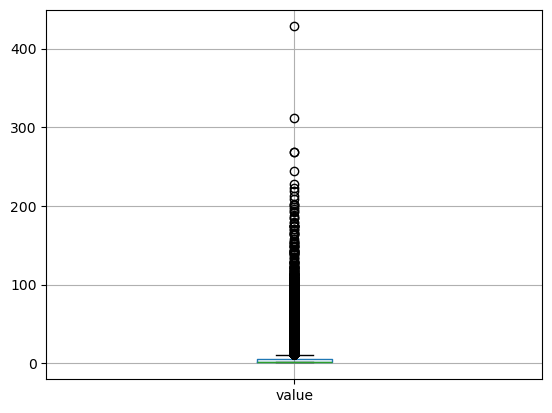

In [9]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [10]:
df_group['value'].sort_index().value_counts()

value
1      85167
2      34148
3      19003
4      12607
5       9235
       ...  
223        1
175        1
109        1
185        1
209        1
Name: count, Length: 172, dtype: int64

In [11]:
df_group.to_csv('df_groupby_final.csv')    # saving df group as a csv file

In [12]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,27
1,1 Ave & E 110 St,1 Ave & E 44 St,2
2,1 Ave & E 110 St,1 Ave & E 68 St,1
3,1 Ave & E 110 St,1 Ave & E 78 St,3
4,1 Ave & E 110 St,1 Ave & E 94 St,15


## Merge data to create latitude and longitude - only for Chicago

# downloading Citi Bike station info feed (includes latitude & longitude)

In [13]:
url = "https://gbfs.citibikenyc.com/gbfs/en/station_information.json"
data = requests.get(url).json()

# Converting JSON to DataFrame

In [14]:
stations = pd.DataFrame(data['data']['stations'])

# Saving to CSV

In [15]:
stations.to_csv("citi_bike_stations.csv",     index=False)


In [16]:
print("✅ CSV saved as citi_bike_stations.csv")
print(stations.head())

✅ CSV saved as citi_bike_stations.csv
                             station_id station_type  \
0                   1905837242740508940      classic   
1  66db3687-0aca-11e7-82f6-3863bb44ef7c      classic   
2  576abdc1-986e-48b0-bde2-051a13d3ff59      classic   
3  41495491-5d89-4e14-aab9-c3db04aad399      classic   
4                   2100948436010992354      classic   

                            external_id        lat  has_kiosk  \
0                   1905837242740508940  40.762110       True   
1  66db3687-0aca-11e7-82f6-3863bb44ef7c  40.700379       True   
2  576abdc1-986e-48b0-bde2-051a13d3ff59  40.744310       True   
3  41495491-5d89-4e14-aab9-c3db04aad399  40.746927       True   
4                   2100948436010992354  40.734247       True   

   electric_bike_surcharge_waiver  eightd_has_key_dispenser  \
0                           False                     False   
1                           False                     False   
2                           False            

In [17]:
stations.head

<bound method NDFrame.head of                                 station_id station_type  \
0                      1905837242740508940      classic   
1     66db3687-0aca-11e7-82f6-3863bb44ef7c      classic   
2     576abdc1-986e-48b0-bde2-051a13d3ff59      classic   
3     41495491-5d89-4e14-aab9-c3db04aad399      classic   
4                      2100948436010992354      classic   
...                                    ...          ...   
2247                   2108372903577159978      classic   
2248                   2108373337368856880      classic   
2249  9d344652-976b-4c2d-bede-2ef19b0fbf13      classic   
2250  b6a13f2b-deb4-4f4d-9d67-7d23bee27c88      classic   
2251  cbc48689-7805-49dd-9669-5471f4b7b6fb      classic   

                               external_id        lat  has_kiosk  \
0                      1905837242740508940  40.762110       True   
1     66db3687-0aca-11e7-82f6-3863bb44ef7c  40.700379       True   
2     576abdc1-986e-48b0-bde2-051a13d3ff59  40.744310    

# Renaming columns and confirming its been done

In [18]:
stations['start_station_name'] = stations['name']

In [19]:
stations.head()

,station_id,station_type,external_id,lat,has_kiosk,electric_bike_surcharge_waiver,eightd_has_key_dispenser,name,lon,capacity,rental_uris,rental_methods,region_id,short_name,eightd_station_services,start_station_name
0,1905837242740508940,classic,1905837242740508940,40.762110,True,False,False,31 St & Broadway,-73.925230,35,{'android': 'https://bkn.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD]",71,6789.20,[],31 St & Broadway
1,66db3687-0aca-11e7-82f6-3863bb44ef7c,classic,66db3687-0aca-11e7-82f6-3863bb44ef7c,40.700379,True,False,False,Columbia Heights & Cranberry St,-73.995481,37,{'android': 'https://bkn.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD]",71,4829.01,[],Columbia Heights & Cranberry St
2,576abdc1-986e-48b0-bde2-051a13d3ff59,classic,576abdc1-986e-48b0-bde2-051a13d3ff59,40.744310,True,False,False,39 St & Queens Blvd,-73.926010,21,{'android': 'https://bkn.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD]",71,6218.04,[],39 St & Queens Blvd
3,41495491-5d89-4e14-aab9-c3db04aad399,classic,41495491-5d89-4e14-aab9-c3db04aad399,40.746927,True,False,False,43 St & Skillman Ave,-73.920825,19,{'android': 'https://bkn.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD]",71,6325.01,[],43 St & Skillman Ave
4,2100948436010992354,classic,2100948436010992354,40.734247,True,False,False,Review Ave & Greenpoint Ave,-73.937768,3,{'android': 'https://bkn.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD]",71,5883.08,[],Review Ave & Greenpoint Ave


In [20]:
stations.rename(columns = {'name': 'end_station_name', 'lat': 'Latitude', 'lon': 'Longitude'}, inplace = True)

In [21]:
stations.reset_index(inplace=True, names="old_index")

In [23]:
stations = stations[['end_station_name', 'start_station_name', 'Latitude', 'Longitude']]

In [24]:
stations

,end_station_name,start_station_name,Latitude,Longitude
0,31 St & Broadway,31 St & Broadway,40.762110,-73.925230
1,Columbia Heights & Cranberry St,Columbia Heights & Cranberry St,40.700379,-73.995481
2,39 St & Queens Blvd,39 St & Queens Blvd,40.744310,-73.926010
3,43 St & Skillman Ave,43 St & Skillman Ave,40.746927,-73.920825
4,Review Ave & Greenpoint Ave,Review Ave & Greenpoint Ave,40.734247,-73.937768
...,...,...,...,...
2247,Union St & Bergen Ave,Union St & Bergen Ave,40.715750,-74.078870
2248,Claremont Ave & JFK Blvd,Claremont Ave & JFK Blvd,40.711890,-74.083850
2249,6 St & Grand St,6 St & Grand St,40.744398,-74.034501
2250,2 St & Park Ave,2 St & Park Ave,40.739153,-74.033082


##### Merging _By start station_

In [25]:
stations_m = df_group.merge(stations, how = 'outer', on = "start_station_name", indicator = 'merge_flag')

In [26]:
stations_m['merge_flag'].value_counts(dropna = False)

merge_flag
both          186302
left_only      20366
right_only       874
Name: count, dtype: int64

In [27]:
stations_m = stations_m[stations_m['merge_flag'] =='both']

In [28]:
stations_m.shape

(186302, 7)

# confirming its been done

In [29]:
stations_m.head()

,start_station_name,end_station_name_x,value,end_station_name_y,Latitude,Longitude,merge_flag
0,1 Ave & E 110 St,1 Ave & E 110 St,27.0,1 Ave & E 110 St,40.792327,-73.9383,both
1,1 Ave & E 110 St,1 Ave & E 44 St,2.0,1 Ave & E 110 St,40.792327,-73.9383,both
2,1 Ave & E 110 St,1 Ave & E 68 St,1.0,1 Ave & E 110 St,40.792327,-73.9383,both
3,1 Ave & E 110 St,1 Ave & E 78 St,3.0,1 Ave & E 110 St,40.792327,-73.9383,both
4,1 Ave & E 110 St,1 Ave & E 94 St,15.0,1 Ave & E 110 St,40.792327,-73.9383,both


In [30]:
stations_m.drop(columns = {'end_station_name_y'}, inplace = True)

In [31]:
stations_m.rename(columns = {'end_station_name_x' : 'end_station_name'}, inplace = True)

##### merging_By end station_

In [32]:
df_final = stations_m.merge(stations, how = 'outer', on = "end_station_name", indicator = 'merge_flag_2')

In [33]:
df_final['merge_flag_2'].value_counts(dropna = False)

merge_flag_2
both          168794
left_only      18096
right_only       872
Name: count, dtype: int64

# confirming its been done

In [34]:
df_final.head()

,start_station_name_x,end_station_name,value,Latitude_x,Longitude_x,merge_flag,start_station_name_y,Latitude_y,Longitude_y,merge_flag_2
0,1 Ave & E 110 St,1 Ave & E 110 St,27.0,40.792327,-73.938300,both,1 Ave & E 110 St,40.792327,-73.9383,both
1,1 Ave & E 30 St,1 Ave & E 110 St,2.0,40.741444,-73.975361,both,1 Ave & E 110 St,40.792327,-73.9383,both
2,1 Ave & E 44 St,1 Ave & E 110 St,12.0,40.750020,-73.969053,both,1 Ave & E 110 St,40.792327,-73.9383,both
3,1 Ave & E 62 St,1 Ave & E 110 St,2.0,40.761227,-73.960940,both,1 Ave & E 110 St,40.792327,-73.9383,both
4,1 Ave & E 68 St,1 Ave & E 110 St,26.0,40.765005,-73.958185,both,1 Ave & E 110 St,40.792327,-73.9383,both


In [35]:
df_final = df_final[df_final['merge_flag_2'] =='both']

In [36]:
df_final.drop(columns = {'start_station_name_y', 'merge_flag', 'merge_flag_2'}, inplace = True)

In [37]:
df_final.rename(columns = {'start_station_name_x' : 'start_station_name'}, inplace = True)

In [38]:
df_final.head()

,start_station_name,end_station_name,value,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,1 Ave & E 110 St,1 Ave & E 110 St,27.0,40.792327,-73.938300,40.792327,-73.9383
1,1 Ave & E 30 St,1 Ave & E 110 St,2.0,40.741444,-73.975361,40.792327,-73.9383
2,1 Ave & E 44 St,1 Ave & E 110 St,12.0,40.750020,-73.969053,40.792327,-73.9383
3,1 Ave & E 62 St,1 Ave & E 110 St,2.0,40.761227,-73.960940,40.792327,-73.9383
4,1 Ave & E 68 St,1 Ave & E 110 St,26.0,40.765005,-73.958185,40.792327,-73.9383


In [39]:
# Sample 20% of the rows
df_sampled = df_final.sample(frac=0.2, random_state=42)

In [40]:
import gc # this is garbage collector which speeds up performance
gc.collect()

9502

In [41]:
df_sampled.head()

,start_station_name,end_station_name,value,Latitude_x,Longitude_x,Latitude_y,Longitude_y
89095,E 55 St & 2 Ave,E 72 St & York Ave,8.0,40.757973,-73.966033,40.766638,-73.953483
164732,Botanical Sq & Webster Ave,W 218 St & Broadway,3.0,40.868140,-73.881450,40.871390,-73.914318
53674,W 100 St & Broadway,Centre St & Chambers St,1.0,40.797372,-73.970412,40.712733,-74.004607
29557,W 159 St & Edgecombe Ave,Adam Clayton Powell Blvd & W 138 St,1.0,40.833303,-73.939326,40.816960,-73.942296
30785,Delancey St & Eldridge St,Allen St & Rivington St,9.0,40.719383,-73.991479,40.720196,-73.989978


In [42]:
df_sampled.rename(columns = {'Latitude_x' : 'start_lat', 'Longitude_x' : 'start_lon', 
       'Latitude_y' : 'end_lat', 'Longitude_y' : 'end_lon',}, inplace = True)

# saving the dataset for the map

In [43]:
df_sampled.to_csv('df_final_locations_for_map.csv')

# # Initializing an instance of a kepler.gl map.

In [44]:

map1 = KeplerGl(height = 700, data={"data_1": df_sampled})


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


# Set map center to New York City

In [45]:
map1.config = {
    "mapState": {
        "latitude": 40.7128,   # NYC center
        "longitude": -74.0060,
        "zoom": 11,            # Adjust zoom level (higher = closer in)
        "bearing": 0,
        "pitch": 0
    }
}

In [46]:
# Adding my dataset (replace df with your trips or stations DataFrame)

In [47]:
map1.add_data(data=df_sampled, name="NYC Bike Trips")

In [48]:
config = map1.config

In [49]:
config

{'mapState': {'latitude': 40.7128,
  'longitude': -74.006,
  'zoom': 11,
  'bearing': 0,
  'pitch': 0}}

In [50]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

# # Saving the map 

In [51]:
map1.save_to_html(file_name = 'Newyork Bikes Trips Aggregated.html', read_only = False, config = config)

Map saved to Newyork Bikes Trips Aggregated.html!


### explain what settings you changed and why.

# Since the start layer is visible, I activated the end layer by clicking on the eye icon to enable a few more stations to appear as points on the map. I also edited the colors

### Add a filter to your map and use it to see what the most common trips are in New York City. What else makes an impression? For example, are there any zones that seem particularly busy? Using some additional research, write a few sentences to make sense of that output.

# The busiest Citi Bike trips are around Williamsburg (Wythe Ave & Metropolitan Ave), the Upper West Side (West End Ave), and the Financial District (West St & Liberty St). These areas are busy because people use bikes to commute to work, especially downtown, and also for going out in popular neighborhoods like Williamsburg. It shows that Citi Bikes are used both for daily travel and for fun or social trips.